In [99]:
import pandas as pd
import numpy as np

In [100]:
dataset = pd.read_csv('ion_.csv')
dataset = dataset.dropna()

In [101]:
dataset.head()

,E QSPR,S QSPR,A QSPR,B QSPR,V,L QSPR,Molecular_weight,LogP,Number_of_HBA_1,Number_of_HBA_2,...,RCHO,RCOR,RCOOH,RCOOR,ROR,RCCH,RCN,RINGS,AROMATIC,log RRF
0,0.41,1.05,0.74,1.00,0.7055,3.110,88.1,1.8275,7,2,...,0,0,1,0,0,0,0,0,0,-3.298432
1,0.35,0.89,0.73,1.00,0.7055,2.966,88.1,1.8275,7,2,...,0,0,1,0,0,0,0,0,0,-3.225483
2,0.35,1.05,0.74,1.00,0.8464,3.583,102.0,2.5343,9,2,...,0,0,1,0,0,0,0,0,0,-3.044312
3,0.95,1.09,0.63,1.24,0.9179,4.987,111.0,2.6765,10,1,...,0,0,0,0,0,0,0,1,1,-2.954677
4,1.78,1.61,1.19,1.32,0.9816,7.180,151.0,0.7890,9,4,...,0,0,0,0,0,0,0,1,1,-2.950782


In [102]:
X = dataset.iloc[:, 0:65].values
y = dataset.iloc[:, 65].values

In [103]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=None)

In [104]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [105]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=500, random_state=0)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test).flatten()

In [106]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.22830353113560908
Mean Squared Error: 0.1196799550229138
Root Mean Squared Error: 0.34594790796146435


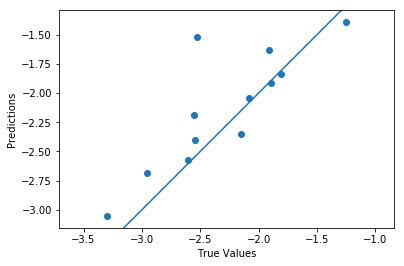

In [107]:
import matplotlib.pyplot as plt
plt.scatter(y_test, y_pred)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.axis('equal')
plt.xlim(plt.xlim())
plt.ylim(plt.ylim())
_ = plt.plot([-100, 100], [-100, 100])
plt.show()

In [108]:
import pandas as pd
df = pd.DataFrame({'predicted_values':y_pred, 'true_values':y_test,})
print(df)

    predicted_values  true_values
0          -1.518605    -2.527244
1          -2.349459    -2.153045
2          -3.055789    -3.298432
3          -2.043092    -2.079877
4          -1.633240    -1.906578
5          -1.839970    -1.806875
6          -2.402237    -2.542118
7          -2.187117    -2.551294
8          -2.685082    -2.954677
9          -1.389396    -1.253366
10         -1.910652    -1.896196
11         -2.577471    -2.602060


In [109]:
df.to_csv('forestplus_ts_5.csv')